In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns

In [39]:
ian = pd.read_csv('ian/ian_posts1.csv')
idalia = pd.read_csv('idalia/idalia_posts1.csv')
milton = pd.read_csv('milton/milton_posts.csv')

In [40]:
# temp only gets you each day's top post on climate change for each tornado timeline
# use if u want a full graph on hashtag climatechange for these timelines

milton_temp = milton[(milton["createTime"] >= "2024-10-01") & (milton["createTime"] <= "2024-10-15")]
idalia_temp = idalia[(idalia["createTime"] >= "2023-08-20") & (idalia["createTime"] <= "2023-9-10")]
ian_temp = ian[(ian["createTime"] >= "2022-09-14") & (ian["createTime"] <= "2022-10-28")]

milton_temp = milton_temp.loc[milton_temp.groupby('createTime')['commentCount'].idxmax()]
milton_temp = milton_temp.sort_values(by=['createTime'], ascending=True).reset_index(drop=True)

idalia_temp = idalia_temp.loc[idalia_temp.groupby('createTime')['commentCount'].idxmax()]
idalia_temp = idalia_temp.sort_values(by=['createTime'], ascending=True).reset_index(drop=True)

ian_temp = ian_temp.loc[ian_temp.groupby('createTime')['commentCount'].idxmax()]
ian_temp = ian_temp.sort_values(by=['createTime'], ascending=True).reset_index(drop=True)

print(f"Temp shapes: {milton_temp.shape}, {idalia_temp.shape}, {ian_temp.shape}")

Temp shapes: (12, 8), (108, 8), (38, 8)


In [42]:
def barplot_subplots(dataset, degree):
    x = np.arange(len(dataset["createTime"]))
    share_y = dataset["shareCount"]
    share_coeffs = np.polyfit(x, share_y, deg=degree)
    share_poly = np.poly1d(share_coeffs)
    x_smooth = np.linspace(x.min(), x.max(), 200)
    share_y_smooth = share_poly(x_smooth)

    comment_y = dataset["commentCount"]
    comment_coeffs = np.polyfit(x, comment_y, deg=degree)
    comment_poly = np.poly1d(comment_coeffs)
    comment_y_smooth = comment_poly(x_smooth)

    start_date = dataset["createTime"][0]
    end_date = dataset["createTime"].iloc[-1] if hasattr(dataset["createTime"], "iloc") else dataset["createTime"][-1]

    fig, axes = plt.subplots(1, 2, figsize=(15, 7), sharex=True)

    axes[0].bar(dataset["createTime"], share_y, color='black', alpha=0.7, label='Share Count')
    axes[0].plot(x_smooth, share_y_smooth, color='red', linewidth=2, label='Deg3 Regression')
    axes[0].set_title(f'Shares vs Time, {dataset}', fontsize=16)
    axes[0].set_ylabel('Number of Shares', fontsize=14)
    axes[0].grid(axis='y', linestyle='--', alpha=0.6)
    axes[0].legend()

    axes[1].bar(dataset["createTime"], comment_y, color='black', alpha=0.7, label='Comment Count')
    axes[1].plot(x_smooth, comment_y_smooth, color='orange', linewidth=2, label='Deg3 Regression')
    axes[1].set_title(f'Comments vs Time, {dataset}', fontsize=16)
    axes[1].set_ylabel('Number of Comments', fontsize=14)
    axes[1].grid(axis='y', linestyle='--', alpha=0.6)
    axes[1].legend()

    plt.xticks(ticks=[x[0], x[-1]], labels=[start_date, end_date], rotation=45)

    plt.tight_layout()
    plt.show()

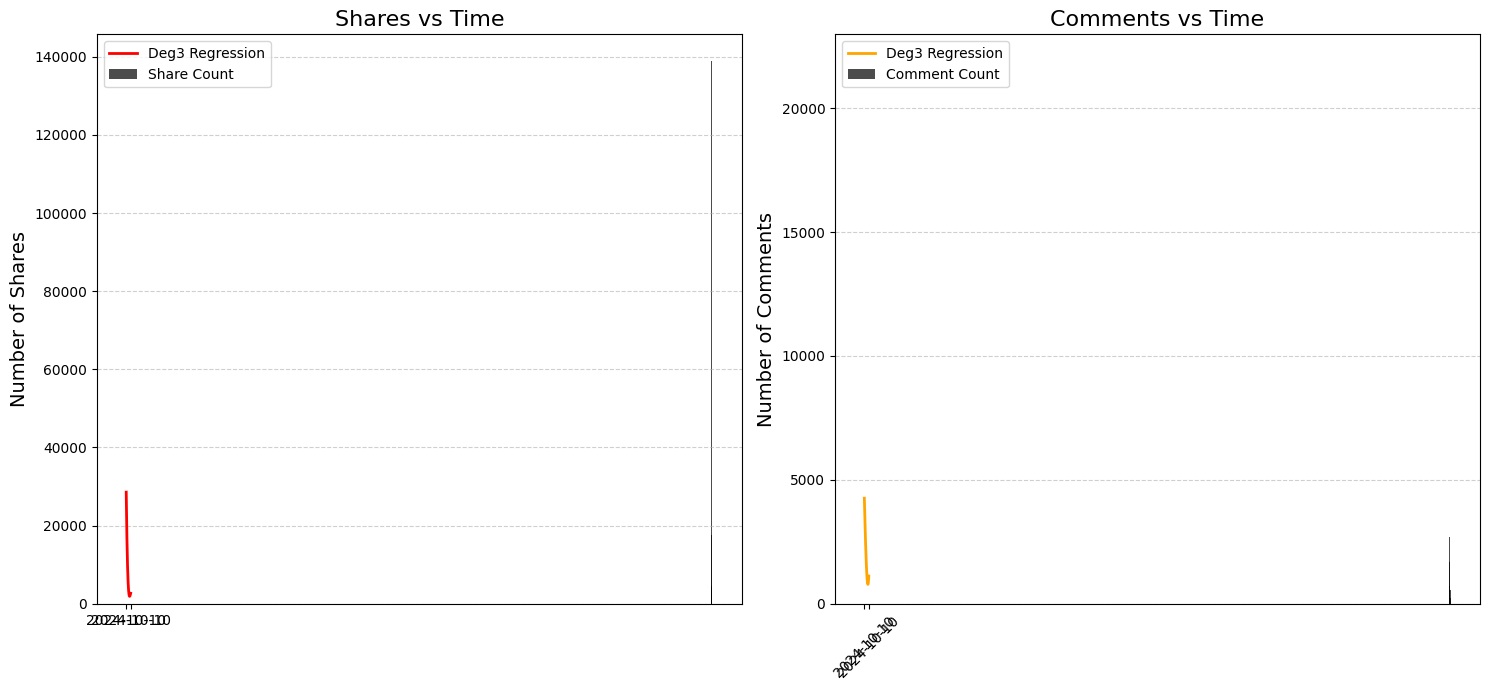

In [43]:
barplot_subplots(milton_temp, 3)

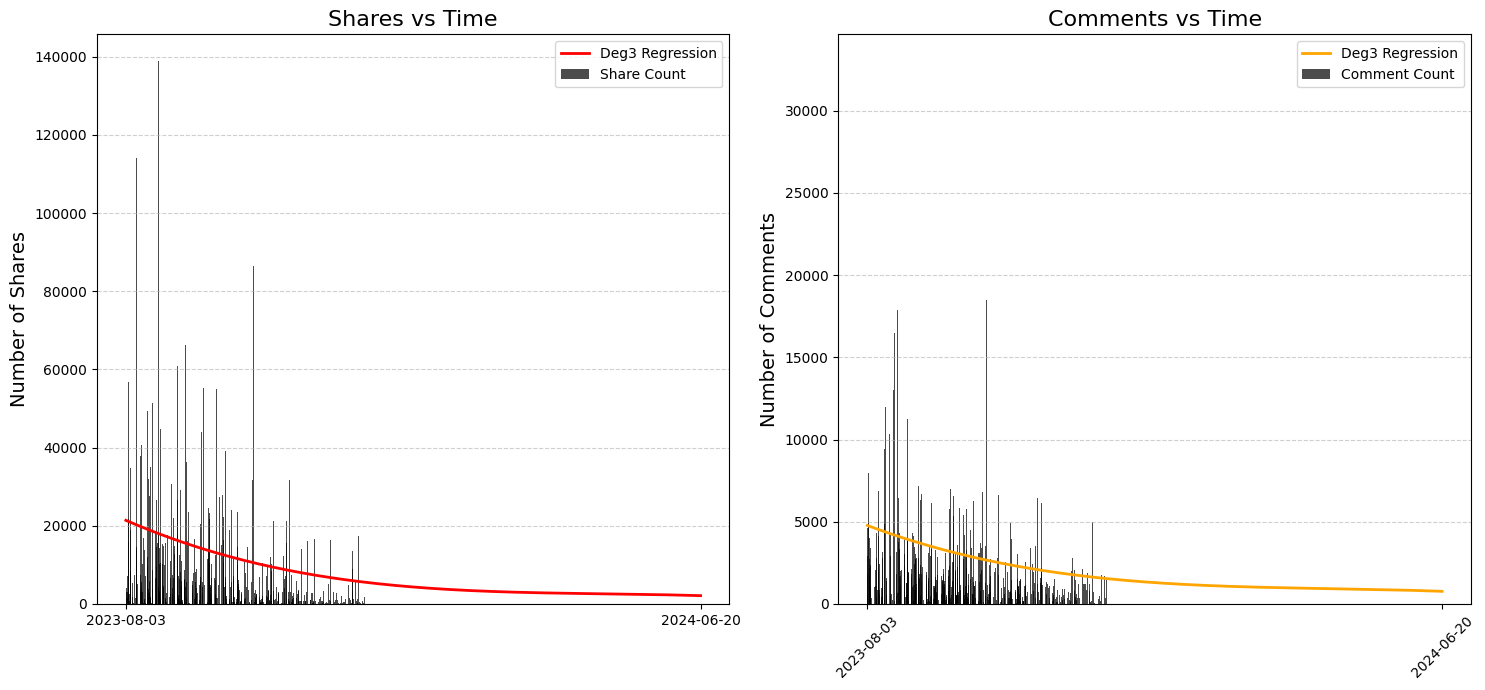

In [44]:
barplot_subplots(idalia_temp, 3)

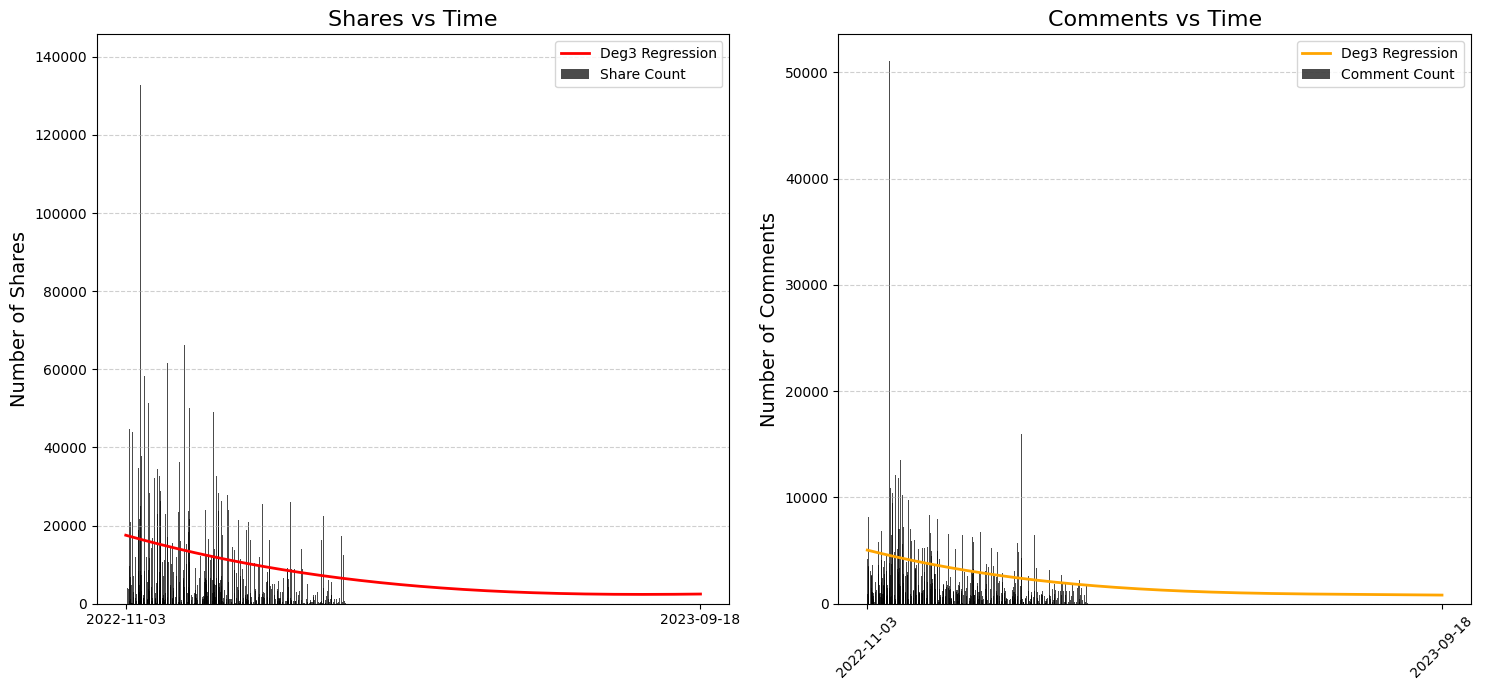

In [45]:
barplot_subplots(ian_temp, 3)